In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the Attrition data file
df = pd.read_csv("Data/AttritionData.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Count the number of null values in each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# Show the number of active/inactive employees in the dataset
print(df.Attrition.value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [5]:
# Turnover rate calculation, assuming headcount is consistent throughout the time period
leavers = (df["Attrition"] == "Yes").sum()
headcount = (df["Attrition"] == "No").sum()

print(f"Turnover: {(leavers / headcount) * 100:.2f}%")

Turnover: 19.22%


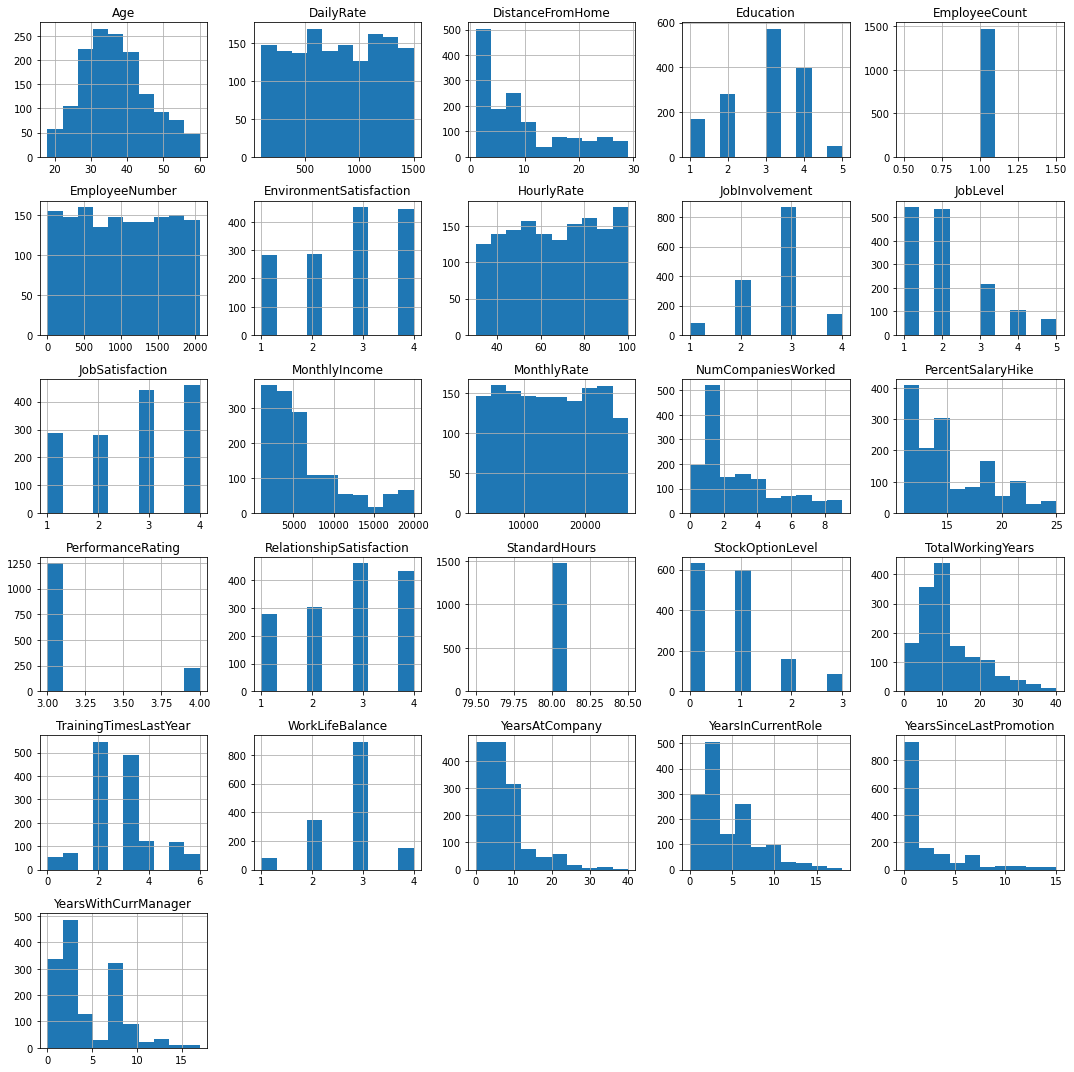

In [6]:
# Explore each feature in the dataset with a histogram
df.hist(figsize=(15,15))
plt.tight_layout()
plt.savefig("Images/Feature-Histograms.png")
plt.show()

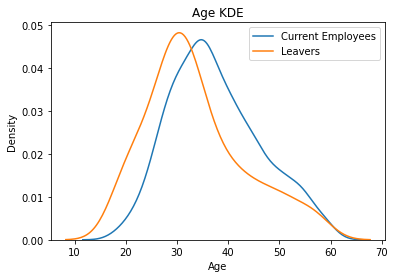

In [7]:
# Attrition comparison: Age
sns.kdeplot(df.loc[df["Attrition"] == "No", "Age"], label = "Current Employees").set(title = "Age KDE")
sns.kdeplot(df.loc[df["Attrition"] == "Yes", "Age"], label = "Leavers")

plt.legend()
plt.savefig("Images/AgeKDE.png")
plt.show()

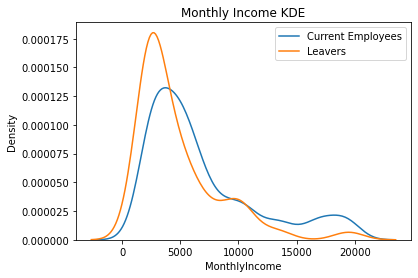

In [8]:
# Attrition comparison: Monthly Income
sns.kdeplot(df.loc[df["Attrition"] == "No", "MonthlyIncome"], label = "Current Employees").set(title = "Monthly Income KDE")
sns.kdeplot(df.loc[df["Attrition"] == "Yes", "MonthlyIncome"], label = "Leavers")

plt.legend()
plt.savefig("Images/IncomeKDE.png")
plt.show()

In [9]:
# Highlight any non-numeric features
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# Create a new df for the converted data types
cat_df = df

# Create a loop to convert the "Object" features so the heatmap can be created
for x in cat_df.columns:
    if cat_df[x].dtype == "object":
        cat_df[x] = cat_df[x].astype("category")
        cat_df[x] = cat_df[x].cat.codes

# Check the converted columns
cat_df.dtypes

Age                         int64
Attrition                    int8
BusinessTravel               int8
DailyRate                   int64
Department                   int8
DistanceFromHome            int64
Education                   int64
EducationField               int8
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                       int8
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                      int8
JobSatisfaction             int64
MaritalStatus                int8
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                       int8
OverTime                     int8
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

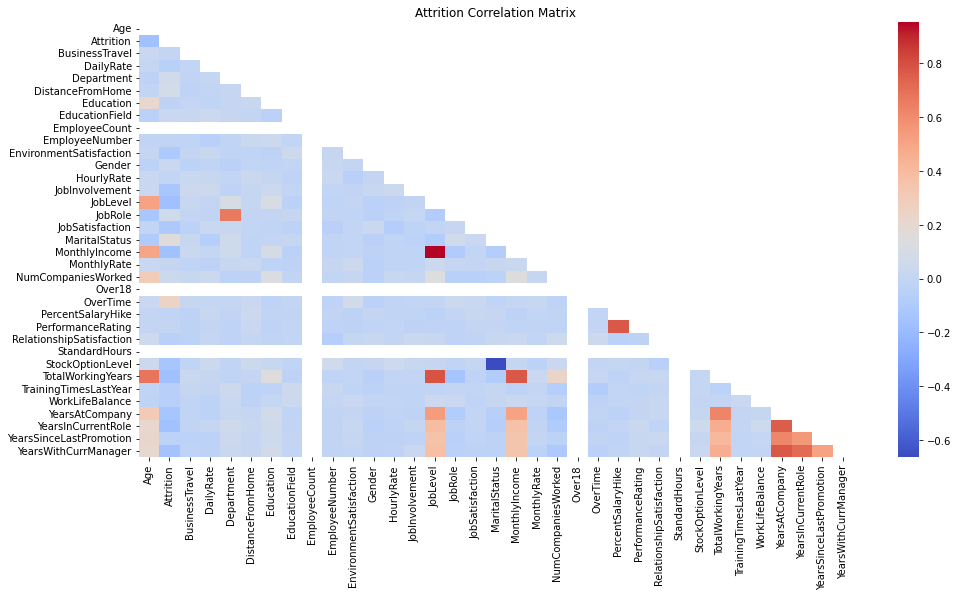

In [11]:
# Create the correlation heat map
corr = cat_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 8))
plt.title("Attrition Correlation Matrix")
sns.heatmap(corr, mask = mask, cmap = "coolwarm")
plt.savefig("Images/CorrelationMatrix.png")
plt.show()

In [12]:
# Show the correlation between Attrition and other features, sorted from positive to negative
corr["Attrition"].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A